In [1]:
from __future__ import print_function

from keras.datasets import mnist
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras import objectives
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
X_train /= 255.0
X_test /= 255.0

# convert class vectors to 1-of-K format
nb_classes = 10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [3]:
print('train samples: ', X_train.shape)
print('test samples: ', X_test.shape)

train samples:  (60000, 784)
test samples:  (10000, 784)


## AutoEncoder

In [4]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [5]:
autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
ae = autoencoder.fit(X_train, X_train,
                 batch_size=128,
                 verbose=1,
                 nb_epoch=30,
                 validation_split=0.1
                 )

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 21s - loss: 0.3189 - val_loss: 0.2578
Epoch 2/30
54000/54000 [==============================] - 20s - loss: 0.2514 - val_loss: 0.2423
Epoch 3/30
54000/54000 [==============================] - 21s - loss: 0.2349 - val_loss: 0.2238
Epoch 4/30
54000/54000 [==============================] - 21s - loss: 0.2171 - val_loss: 0.2078
Epoch 5/30
54000/54000 [==============================] - 24s - loss: 0.2019 - val_loss: 0.1929
Epoch 6/30
54000/54000 [==============================] - 22s - loss: 0.1855 - val_loss: 0.1779
Epoch 7/30
54000/54000 [==============================] - 18s - loss: 0.1759 - val_loss: 0.1718
Epoch 8/30
54000/54000 [==============================] - 17s - loss: 0.1693 - val_loss: 0.1659
Epoch 9/30
54000/54000 [==============================] - 17s - loss: 0.1640 - val_loss: 0.1613
Epoch 10/30
54000/54000 [==============================] - 18s - loss: 0.1599 - val_los

/Users/sho/.pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


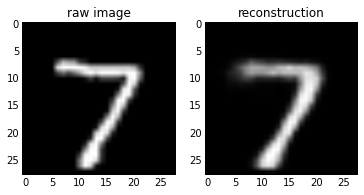

In [7]:
plt.subplot(121)
plt.imshow(X_test[0].reshape(28,28),cmap='gray')
plt.title("raw image")
plt.subplot(122)
plt.imshow(autoencoder.predict(X_test[:1]).reshape(28,28),cmap='gray')
plt.title("reconstruction")
plt.legend()
plt.show()

In [8]:
encoder = Model(input=input_img, output=encoded)

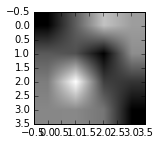

In [9]:
encoded_imgs = encoder.predict(X_test[:1])
plt.figure(figsize=(2,2))
plt.imshow(encoded_imgs.reshape(4,4),cmap='gray')

## Denoising AutoEncoder

In [10]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

/Users/sho/.pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


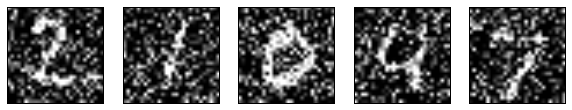

In [11]:
n = 5
plt.figure(figsize=(10, 2))
for i in range(n):
    ax = plt.subplot(1, n, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
input_img_d = Input(shape=(784,))
encoded_d = Dense(128, activation='relu')(input_img_d)
encoded_d = Dense(64, activation='relu')(encoded_d)
encoded_d = Dense(16, activation='relu')(encoded_d)

decoded_d = Dense(64, activation='relu')(encoded_d)
decoded_d = Dense(128, activation='relu')(decoded_d)
decoded_d = Dense(784, activation='sigmoid')(decoded_d)

In [13]:
autoencoder_d = Model(input=input_img_d, output=decoded_d)
autoencoder_d.compile(optimizer='adadelta', loss='binary_crossentropy')

In [14]:
ae_d = autoencoder_d.fit(X_train_noisy, X_train,
                 batch_size=128,
                 verbose=2,
                 nb_epoch=100,
                 validation_split=0.1
                 )

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
19s - loss: 0.3013 - val_loss: 0.2587
Epoch 2/100
19s - loss: 0.2562 - val_loss: 0.2518
Epoch 3/100
20s - loss: 0.2447 - val_loss: 0.2356
Epoch 4/100
20s - loss: 0.2281 - val_loss: 0.2187
Epoch 5/100
18s - loss: 0.2104 - val_loss: 0.2032
Epoch 6/100
18s - loss: 0.2001 - val_loss: 0.1956
Epoch 7/100
16s - loss: 0.1927 - val_loss: 0.1891
Epoch 8/100
18s - loss: 0.1871 - val_loss: 0.1843
Epoch 9/100
22s - loss: 0.1825 - val_loss: 0.1797
Epoch 10/100
20s - loss: 0.1784 - val_loss: 0.1762
Epoch 11/100
18s - loss: 0.1747 - val_loss: 0.1727
Epoch 12/100
17s - loss: 0.1716 - val_loss: 0.1699
Epoch 13/100
19s - loss: 0.1686 - val_loss: 0.1666
Epoch 14/100
18s - loss: 0.1656 - val_loss: 0.1649
Epoch 15/100
19s - loss: 0.1632 - val_loss: 0.1613
Epoch 16/100
17s - loss: 0.1608 - val_loss: 0.1602
Epoch 17/100
20s - loss: 0.1591 - val_loss: 0.1578
Epoch 18/100
23s - loss: 0.1571 - val_loss: 0.1564
Epoch 19/100
20s - loss: 0.1554 - val_loss

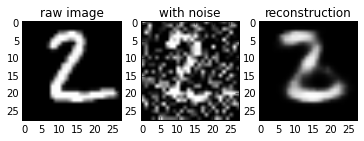

In [15]:
plt.subplot(131)
plt.imshow(X_test[1].reshape(28,28),cmap='gray')
plt.title("raw image")
plt.subplot(132)
plt.imshow(X_test_noisy[1].reshape(28,28),cmap='gray')
plt.title("with noise")
plt.subplot(133)
plt.imshow(autoencoder_d.predict(X_test_noisy[1:2]).reshape(28,28),cmap='gray')
plt.title("reconstruction")
plt.legend()
plt.show()